In [1]:
import cveig
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import binom
import pickle
from tqdm.autonotebook import tqdm
import seaborn as sns

<ipython-input-1-bf68ba4e83d5>:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
k = 10
n_tries = 10
expected_degrees = np.arange(25, 61, 5)
thetas = ['point', 'exp', 'pareto']
results = np.empty((n_tries, len(expected_degrees), len(thetas), 4))

for d, degree in enumerate(tqdm(expected_degrees)):
    for i in tqdm(range(n_tries)):
        for j, theta in enumerate(thetas):
            file = f'../../masters_r/samples/graph_{theta}_{degree}_{i+1}.table'
            # print(file)
            adj_matrix = pd.read_table(file, sep=' ').to_numpy()
                
            adj_matrix = sparse.csr_array(adj_matrix)

            results[i, d, j, 0] = cveig.eig_cv(adj_matrix, 15, 0.1, folds=1)
            results[i, d, j, 1] = cveig.eig_cv(adj_matrix, 15, 0.1, folds=5)
            results[i, d, j, 2] = cveig.eig_cv(adj_matrix, 15, 0.1, folds=10)
            results[i, d, j, 3] = cveig.eig_cv(adj_matrix, 15, 0.1, folds=15)


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [3]:
with open('results_folds.pickle', 'wb') as f:
    pickle.dump(results, f)

In [4]:
avg_results = np.mean(results, axis=(0))

In [5]:
labels = ['1', '5', '10', '15']
titles = [
    'Point distribution',
    'Exponential distribution',
    'Pareto distribution',
    ]

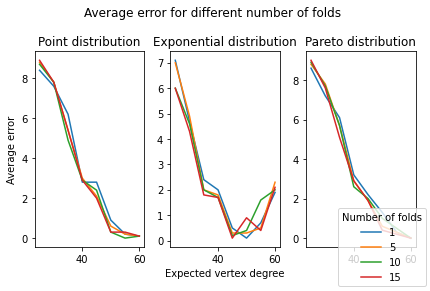

In [6]:
fig, ax = plt.subplots(1,3)

for i, title in enumerate(titles):
    ax[i].set_title(title)
    for j, label in enumerate(labels):
        ax[i].plot(expected_degrees, np.abs(avg_results[:, i, j] - 10), label=label)

ax[0].set_ylabel('Average error')
ax[1].set_xlabel('Expected vertex degree')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', title='Number of folds')
fig.suptitle('Average error for different number of folds')
fig.tight_layout()
fig.savefig('test_folds.png')

In [7]:
names = ['sample', 'degree', 'theta', 'nfolds']
thetas = ['point', 'exp', 'pareto']
folds = [1, 5, 10, 15]
labels = [np.arange(n_tries), expected_degrees, thetas, folds]

In [8]:
index = pd.MultiIndex.from_product(labels, names=names)
result_df = pd.DataFrame(results.reshape(-1, 1),index=index)
result_df.columns = ['value']
result_df['error'] = np.abs(result_df.value - 10)

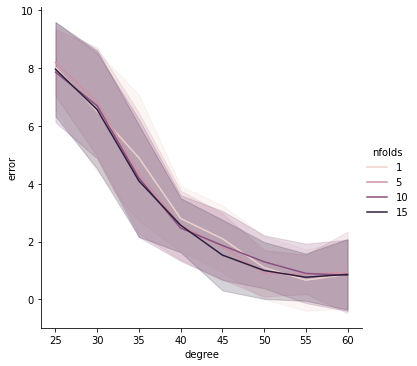

In [9]:
sns.relplot(x="degree", y="error", kind="line", ci="sd", data=result_df, hue='nfolds')

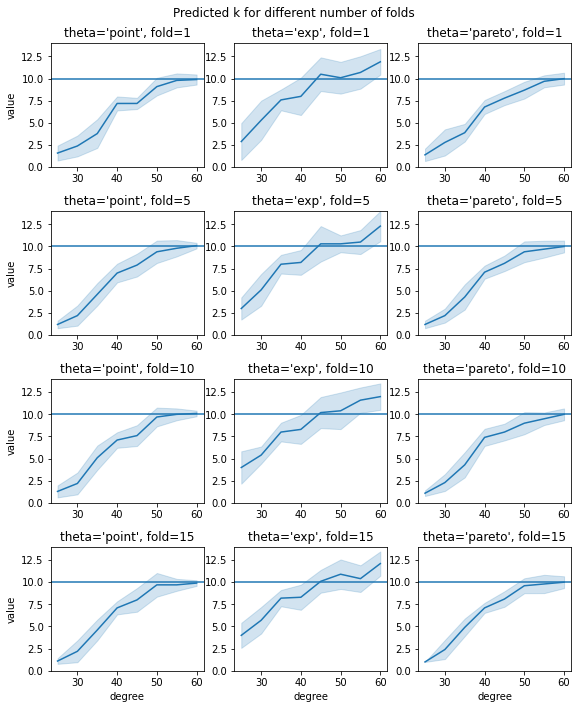

In [10]:
fig, ax = plt.subplots(4,3, figsize=(8,10))
degrees = []
for i, fold in enumerate(folds):
    for j, theta in enumerate(thetas):
        # ax[i, j].set_title(theta)
        sns.lineplot(
            x="degree", 
            y="value", 
            ci="sd", 
            data=result_df.loc[:, :, theta, fold], 
            ax=ax[i, j],
            )
        ax[i,j].set_ylim(0, 14)
        ax[i,j].set_title(f'{theta=}, {fold=}')
        ax[i,j].axhline(10)
        if i<3: 
            ax[i,j].set_xlabel(None)
        if j>0: ax[i,j].set_ylabel(None)



#ax[0].set_ylabel('Average error')
#ax[1].set_xlabel('Expected vertex degree')
#handles, labels = ax[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower right', title='Number of folds')
fig.suptitle('Predicted k for different number of folds')
fig.tight_layout()
fig.savefig('test_folds2.png')

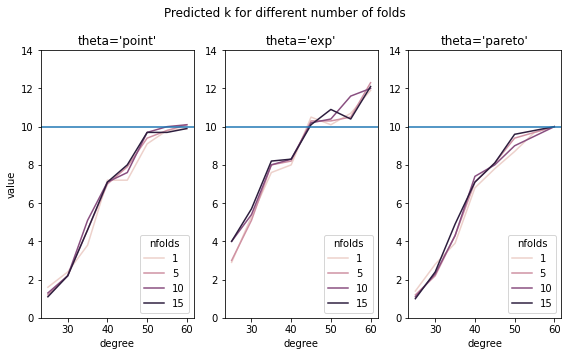

In [18]:
fig, ax = plt.subplots(1,3, figsize=(8,5))
degrees = []
for j, theta in enumerate(thetas):
    # ax[i, j].set_title(theta)
    sns.lineplot(
        x="degree", 
        y="value", 
        ci=None, 
        data=result_df.loc[:, :, theta, :], 
        ax=ax[j],
        hue='nfolds',
        )
    ax[j].set_ylim(0, 14)
    ax[j].set_title(f'{theta=}')
    ax[j].axhline(10)
    if j>0: ax[j].set_ylabel(None)



#ax[0].set_ylabel('Average error')
#ax[1].set_xlabel('Expected vertex degree')
#handles, labels = ax[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower right', title='Number of folds')
fig.suptitle('Predicted k for different number of folds')
fig.tight_layout()
fig.savefig('test_folds3.png')

NameError: name 'point_1' is not defined

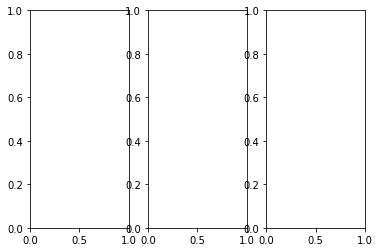

In [12]:
fig, ax = plt.subplots(1,3)
ax[0].plot(expected_degrees, point_1, label='1')
ax[0].plot(expected_degrees, point_5, label='5')
ax[0].plot(expected_degrees, point_10, label='10')
ax[0].plot(expected_degrees, point_15, label='15')
ax[0].set_title('Point distribution')
ax[0].set_ylabel('Average error')

ax[1].plot(expected_degrees, exp_1, label='1')
ax[1].plot(expected_degrees, exp_5, label='5')
ax[1].plot(expected_degrees, exp_10, label='10')
ax[1].plot(expected_degrees, exp_15, label='15')
ax[1].set_title('Exponential distribution')

ax[2].plot(expected_degrees, pareto_1, label='1')
ax[2].plot(expected_degrees, pareto_5, label='5')
ax[2].plot(expected_degrees, pareto_10, label='10')
ax[2].plot(expected_degrees, pareto_15, label='15')
ax[2].set_title('Pareto distribution')
ax[1].set_xlabel('Expected vertex degree')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', title='Number of folds')
fig.suptitle('Average error for different number of folds')
fig.tight_layout()
fig.savefig('test_folds.png')